In [67]:
import numpy as np
import pandas as pd

# steps
# 0 preprocess + EDA + feature selection
# 1 Extract input and output cols
# 2 scale the values
# 3 train test split
# 4 train the model
# 5 Evaluate the model/model selection
# 6 Deploy the model

In [68]:
df = pd.read_csv('Downloads/placement_csv.csv')

In [69]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [70]:
df = df.iloc[:,1:]

In [71]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [72]:
import matplotlib.pyplot as plt

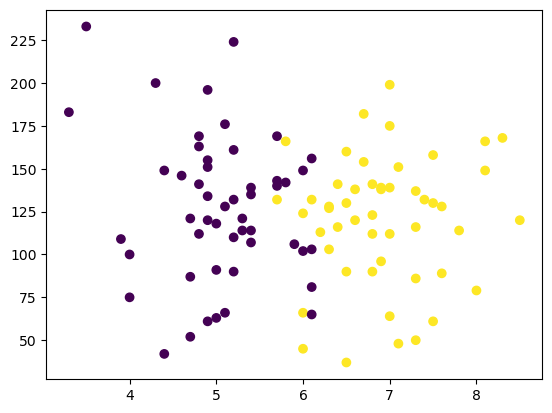

In [73]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [76]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [77]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

In [85]:
X_train = scaler.fit_transform(X_train)

In [86]:
X_test = scaler.transform(X_test)

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
clf = LogisticRegression()

In [89]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [90]:
y_pred = clf.predict(X_test)

In [91]:
y_test

30    1
46    0
76    0
18    0
94    0
95    0
90    1
93    1
26    1
54    1
Name: placement, dtype: int64

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(y_test,y_pred)

0.5

In [96]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [98]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

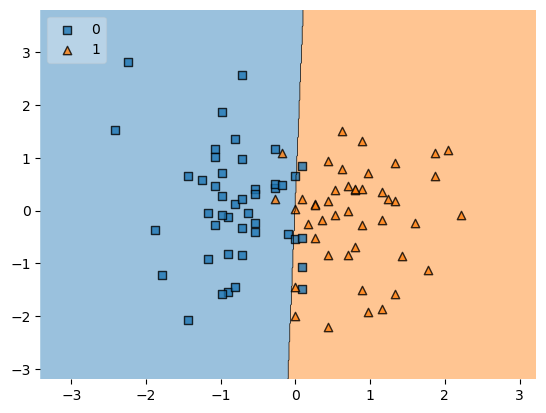

In [99]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [100]:
import pickle

In [101]:
pickle.dump(clf,open('model.pkl','wb'))